In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from models.models import CNNPolicy, RNNPolicy
from utils.utils import train_valid_split, createTensor, estimate_reward, transaction_cost
from training.training import train
import pickle


In [5]:
currencies = ["ETH", "TRX", "LTC", "SOL", "ADA", "AVA", "DOGE", "ATOM"]

In [6]:
df = {}
for currency in currencies:
    df[currency] = pd.read_json(f"./data/{currency}_BTC_train.json")
    df[currency].columns = ["low", "high", "open", "close", "amount", "quantity", "buyTakerQmount", "buyTakerQuantity", "tradeCount", "ts", "weightedAverage", "interval", "startTime", "closeTime"]
    df[currency]["rolling_mean_close"] = df[currency]["close"].rolling(window = 100).mean()
    df[currency]["rolling_mean_high"] = df[currency]["high"].rolling(window = 100).mean()
    df[currency]["rolling_mean_low"] = df[currency]["low"].rolling(window = 100).mean()
#    if df[currency].isnull().values.any():
#        print(currency)

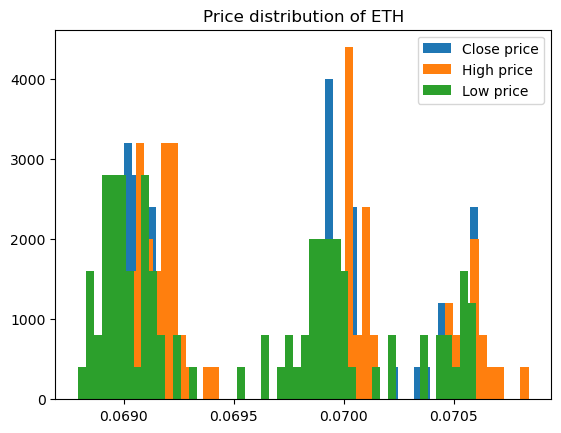

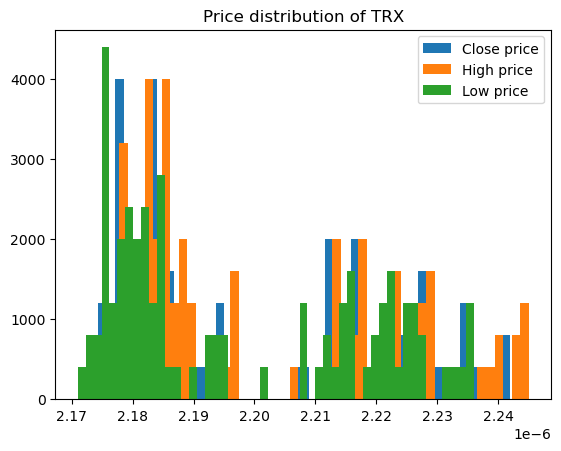

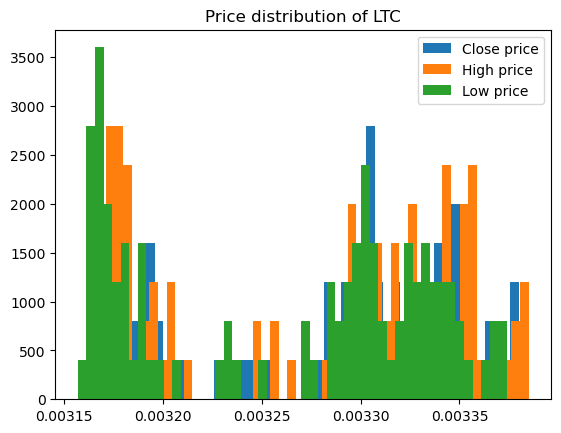

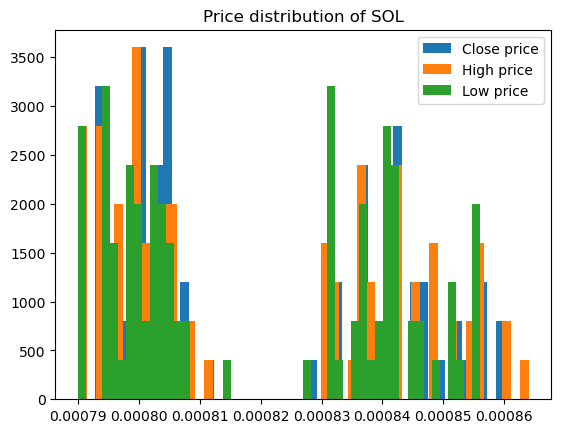

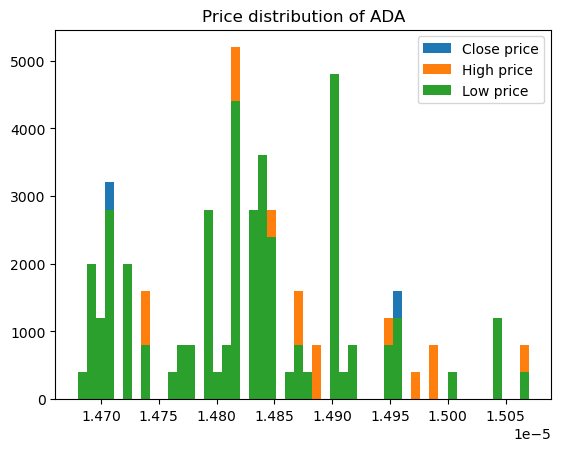

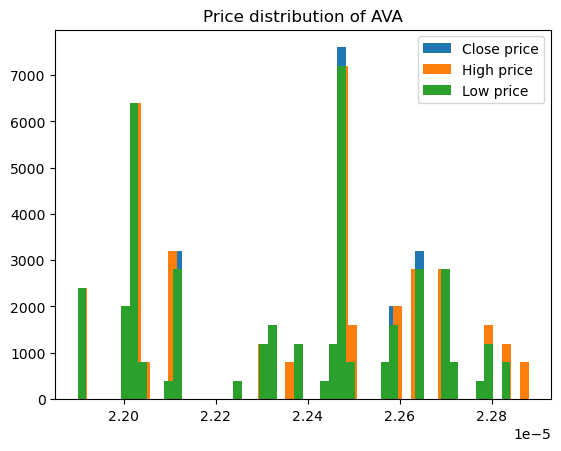

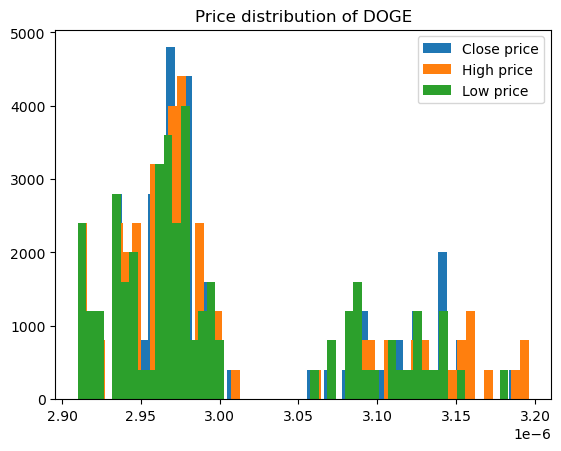

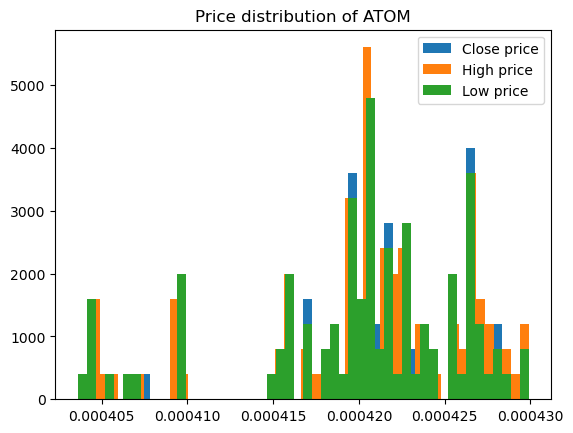

In [10]:
for currency in currencies:
    plt.figure()
    plt.hist(df[currency]["close"], bins=50, label="Close price")
    plt.hist(df[currency]["high"], bins=50, label="High price")
    plt.hist(df[currency]["low"], bins=50, label="Low price")
    plt.title(f"Price distribution of {currency}")
    plt.legend()
#    sns.lineplot(x=index,y="close", data=df[currency])
    plt.show()

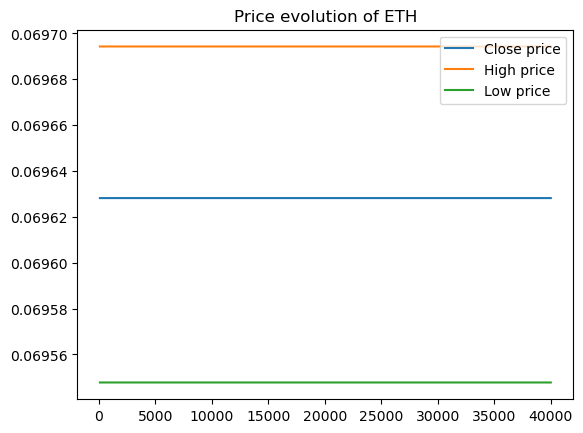

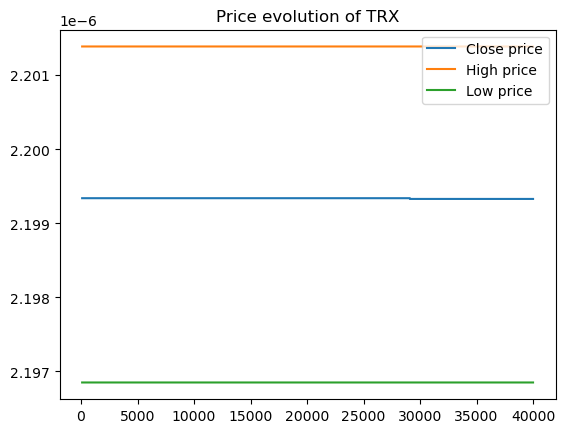

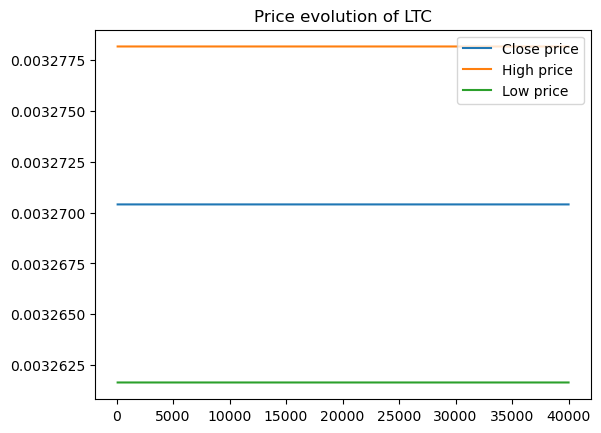

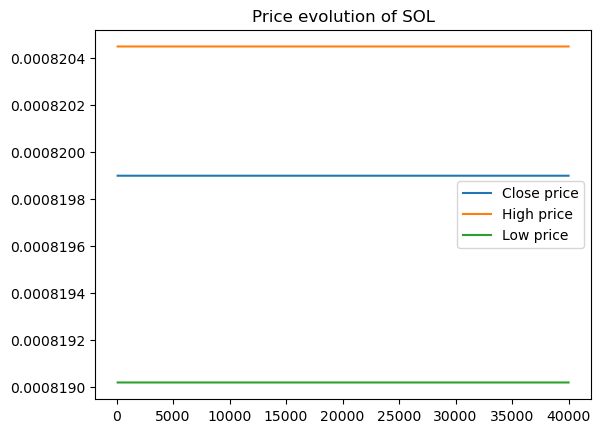

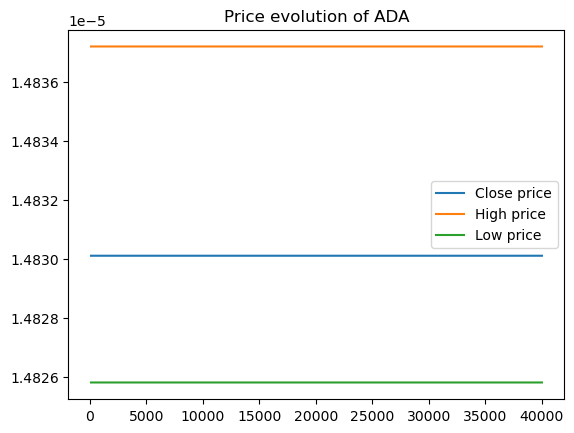

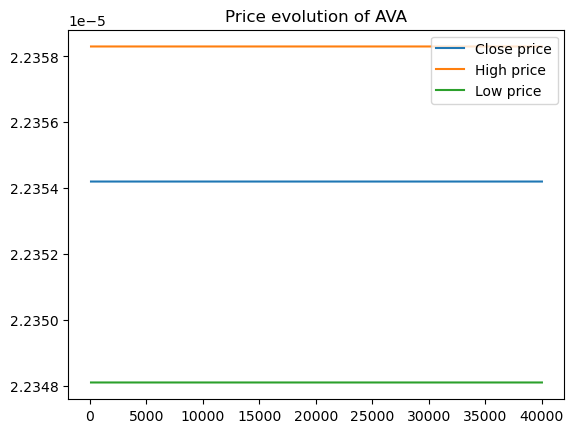

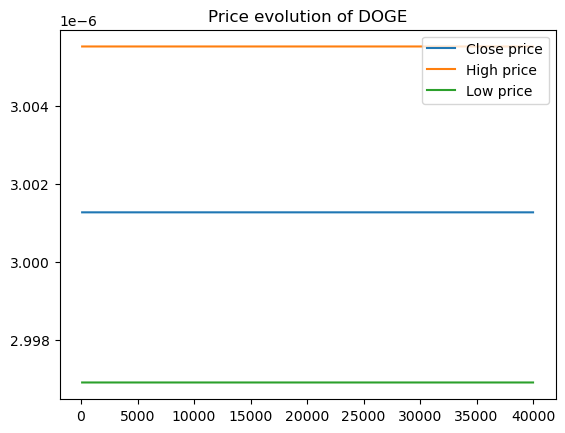

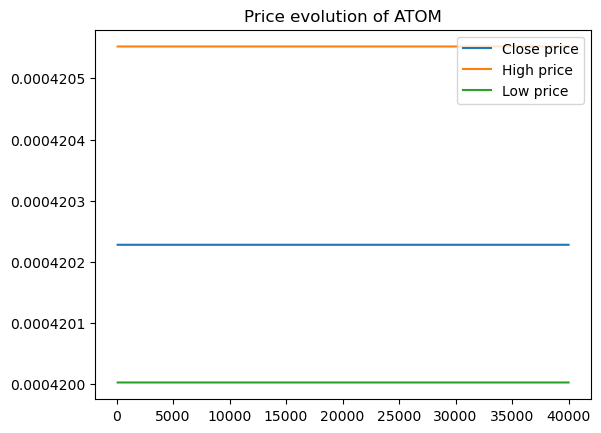

In [11]:
for currency in currencies:
    plt.figure()
    plt.plot(df[currency]["rolling_mean_close"], label="Close price")
    plt.plot(df[currency]["rolling_mean_high"], label="High price")
    plt.plot(df[currency]["rolling_mean_low"], label="Low price")
    plt.title(f"Price evolution of {currency}")
    plt.legend()
#    sns.lineplot(x=index,y="close", data=df[currency])
    plt.show()

### Testing functions 

In [10]:
createTensor(df, time=100).shape

torch.Size([3, 8, 50])

### Training

In [12]:
# To do: transform the price into relative price y_t = v_t/v_(t-1)
train_data, valid_data = train_valid_split(df)

[40000, 40000, 40000, 40000, 40000, 40000, 40000, 40000]


In [16]:
with open("data/train_data.pkl", "wb") as f:
    pickle.dump(train_data, f)
with open("data/valid_data.pkl", "wb") as f:
    pickle.dump(valid_data, f)

In [2]:
# Load the data
with open("data/train_data.pkl", "rb") as f:
    train_data = pickle.load(f)
with open("data/valid_data.pkl", "rb") as f:
    valid_data = pickle.load(f)

In [5]:
import importlib
import utils
importlib.reload(utils)

<module 'outils' from '/home/viet1004/reinforcement_learning/portfolio_management/outils/__init__.py'>

In [3]:
cnnPolicy = CNNPolicy()
optimizer = optim.Adam(cnnPolicy.parameters(), lr=1e-3)
train(cnnPolicy, train_data, valid_data, optimizer)

  0%|          | 0/100 [00:00<?, ?it/s]/home/viet1004/reinforcement_learning/portfolio_management/utils/utils.py:72: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525493953/work/aten/src/ATen/native/TensorShape.cpp:3277.)
  current_strategy_prime = previous_strategy * relative_price / previous_strategy.T.dot(relative_price)


torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.

  0%|          | 0/100 [00:07<?, ?it/s]

torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.Size([20, 8])
torch.Size([8, 1])
torch.

KeyboardInterrupt: 

In [3]:
rnnPolicy = RNNPolicy()
optimizer = optim.Adam(rnnPolicy.parameters(), lr=1e-3)
train(rnnPolicy, train_data, valid_data, optimizer)

  0%|          | 0/100 [00:00<?, ?it/s]/home/viet1004/reinforcement_learning/portfolio_management/utils/utils.py:72: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525493953/work/aten/src/ATen/native/TensorShape.cpp:3277.)
  current_strategy_prime = previous_strategy * relative_price / previous_strategy.T.dot(relative_price)
  1%|          | 1/100 [01:42<2:49:44, 102.88s/it]

Epoch 0, train loss: -0.012391, valid loss: -0.000151


  2%|▏         | 2/100 [03:21<2:44:00, 100.41s/it]

Epoch 1, train loss: -0.018501, valid loss: -0.000151


  3%|▎         | 3/100 [05:19<2:55:37, 108.63s/it]

Epoch 2, train loss: -0.015330, valid loss: -0.000150


  4%|▍         | 4/100 [06:33<2:31:19, 94.58s/it] 

Epoch 3, train loss: -0.014848, valid loss: -0.000150


  5%|▌         | 5/100 [08:07<2:29:50, 94.63s/it]

Epoch 4, train loss: -0.017389, valid loss: -0.000149


  6%|▌         | 6/100 [09:27<2:20:24, 89.62s/it]

Epoch 5, train loss: -0.018876, valid loss: -0.000148


  7%|▋         | 7/100 [11:34<2:37:39, 101.71s/it]

Epoch 6, train loss: -0.019252, valid loss: -0.000151


  8%|▊         | 8/100 [12:36<2:16:33, 89.06s/it] 

Epoch 7, train loss: -0.018660, valid loss: -0.000151


  9%|▉         | 9/100 [13:26<1:56:40, 76.93s/it]

Epoch 8, train loss: -0.015297, valid loss: -0.000151


 10%|█         | 10/100 [14:07<1:38:49, 65.89s/it]

Epoch 9, train loss: -0.016234, valid loss: -0.000150


 11%|█         | 11/100 [14:46<1:25:35, 57.70s/it]

Epoch 10, train loss: -0.016655, valid loss: -0.000150


 12%|█▏        | 12/100 [15:19<1:13:32, 50.14s/it]

Epoch 11, train loss: -0.016341, valid loss: -0.000149


 13%|█▎        | 13/100 [15:52<1:05:11, 44.97s/it]

Epoch 12, train loss: -0.016249, valid loss: -0.000148


 14%|█▍        | 14/100 [16:25<59:17, 41.36s/it]  

Epoch 13, train loss: -0.014597, valid loss: -0.000147


 15%|█▌        | 15/100 [17:02<56:44, 40.05s/it]

Epoch 14, train loss: -0.014236, valid loss: -0.000148


 16%|█▌        | 16/100 [17:38<54:06, 38.65s/it]

Epoch 15, train loss: -0.013690, valid loss: -0.000147


 17%|█▋        | 17/100 [18:16<53:32, 38.71s/it]

Epoch 16, train loss: -0.012146, valid loss: -0.000146


 18%|█▊        | 18/100 [18:49<50:12, 36.73s/it]

Epoch 17, train loss: -0.014170, valid loss: -0.000145


 19%|█▉        | 19/100 [19:21<47:45, 35.37s/it]

Epoch 18, train loss: -0.010993, valid loss: -0.000144


 20%|██        | 20/100 [19:54<46:25, 34.82s/it]

Epoch 19, train loss: -0.011617, valid loss: -0.000143


 21%|██        | 21/100 [20:30<46:12, 35.09s/it]

Epoch 20, train loss: -0.010834, valid loss: -0.000142


 22%|██▏       | 22/100 [21:07<46:19, 35.63s/it]

Epoch 21, train loss: -0.012092, valid loss: -0.000141


 23%|██▎       | 23/100 [21:51<49:05, 38.25s/it]

Epoch 22, train loss: -0.009665, valid loss: -0.000140


 24%|██▍       | 24/100 [22:34<49:59, 39.47s/it]

Epoch 23, train loss: -0.009564, valid loss: -0.000140


 25%|██▌       | 25/100 [23:19<51:40, 41.34s/it]

Epoch 24, train loss: -0.005617, valid loss: -0.000140


 26%|██▌       | 26/100 [24:03<51:42, 41.93s/it]

Epoch 25, train loss: -0.006707, valid loss: -0.000140


 27%|██▋       | 27/100 [24:42<49:54, 41.01s/it]

Epoch 26, train loss: -0.006374, valid loss: -0.000141


 28%|██▊       | 28/100 [25:33<53:08, 44.28s/it]

Epoch 27, train loss: -0.006625, valid loss: -0.000140


 29%|██▉       | 29/100 [26:31<57:06, 48.26s/it]

Epoch 28, train loss: -0.002604, valid loss: -0.000140


 30%|███       | 30/100 [27:20<56:37, 48.54s/it]

Epoch 29, train loss: -0.005438, valid loss: -0.000140


 31%|███       | 31/100 [28:06<54:58, 47.80s/it]

Epoch 30, train loss: -0.004095, valid loss: -0.000139


 32%|███▏      | 32/100 [29:01<56:37, 49.97s/it]

Epoch 31, train loss: -0.003986, valid loss: -0.000139


 33%|███▎      | 33/100 [29:48<54:38, 48.93s/it]

Epoch 32, train loss: -0.001787, valid loss: -0.000138


 34%|███▍      | 34/100 [30:21<48:31, 44.12s/it]

Epoch 33, train loss: 0.000192, valid loss: -0.000138


 35%|███▌      | 35/100 [30:51<43:15, 39.93s/it]

Epoch 34, train loss: 0.001054, valid loss: -0.000138


 36%|███▌      | 36/100 [31:22<39:53, 37.40s/it]

Epoch 35, train loss: -0.001546, valid loss: -0.000138


 37%|███▋      | 37/100 [31:54<37:23, 35.61s/it]

Epoch 36, train loss: 0.000367, valid loss: -0.000138


 38%|███▊      | 38/100 [32:25<35:24, 34.26s/it]

Epoch 37, train loss: 0.001166, valid loss: -0.000138


 39%|███▉      | 39/100 [32:55<33:43, 33.17s/it]

Epoch 38, train loss: 0.003802, valid loss: -0.000139


 40%|████      | 40/100 [33:26<32:15, 32.26s/it]

Epoch 39, train loss: 0.000662, valid loss: -0.000139


 41%|████      | 41/100 [33:56<31:13, 31.76s/it]

Epoch 40, train loss: 0.001242, valid loss: -0.000139


 42%|████▏     | 42/100 [34:26<30:14, 31.29s/it]

Epoch 41, train loss: 0.007349, valid loss: -0.000140


 43%|████▎     | 43/100 [34:57<29:26, 31.00s/it]

Epoch 42, train loss: 0.010188, valid loss: -0.000140


 44%|████▍     | 44/100 [35:26<28:30, 30.54s/it]

Epoch 43, train loss: 0.007892, valid loss: -0.000141


 45%|████▌     | 45/100 [35:57<27:59, 30.53s/it]

Epoch 44, train loss: 0.009365, valid loss: -0.000142


 46%|████▌     | 46/100 [36:27<27:26, 30.49s/it]

Epoch 45, train loss: 0.010505, valid loss: -0.000142


 47%|████▋     | 47/100 [36:58<27:06, 30.70s/it]

Epoch 46, train loss: 0.012675, valid loss: -0.000143


 48%|████▊     | 48/100 [37:30<26:58, 31.13s/it]

Epoch 47, train loss: 0.012673, valid loss: -0.000144


 49%|████▉     | 49/100 [38:01<26:13, 30.86s/it]

Epoch 48, train loss: 0.016102, valid loss: -0.000145


 50%|█████     | 50/100 [38:31<25:35, 30.71s/it]

Epoch 49, train loss: 0.009856, valid loss: -0.000146


 51%|█████     | 51/100 [39:02<25:09, 30.80s/it]

Epoch 50, train loss: 0.014110, valid loss: -0.000146


 52%|█████▏    | 52/100 [39:32<24:32, 30.67s/it]

Epoch 51, train loss: 0.014907, valid loss: -0.000147


 53%|█████▎    | 53/100 [40:05<24:23, 31.14s/it]

Epoch 52, train loss: 0.020763, valid loss: -0.000148


 54%|█████▍    | 54/100 [40:34<23:35, 30.76s/it]

Epoch 53, train loss: 0.016295, valid loss: -0.000149


 55%|█████▌    | 55/100 [41:05<22:57, 30.61s/it]

Epoch 54, train loss: 0.014197, valid loss: -0.000150


 56%|█████▌    | 56/100 [41:35<22:25, 30.58s/it]

Epoch 55, train loss: 0.018575, valid loss: -0.000151


 57%|█████▋    | 57/100 [42:14<23:46, 33.18s/it]

Epoch 56, train loss: 0.015955, valid loss: -0.000151


 58%|█████▊    | 58/100 [42:51<23:51, 34.08s/it]

Epoch 57, train loss: 0.013293, valid loss: -0.000152


 59%|█████▉    | 59/100 [43:22<22:40, 33.17s/it]

Epoch 58, train loss: 0.018393, valid loss: -0.000153


 60%|██████    | 60/100 [43:53<21:38, 32.46s/it]

Epoch 59, train loss: 0.016559, valid loss: -0.000154


 61%|██████    | 61/100 [44:29<21:58, 33.81s/it]

Epoch 60, train loss: 0.014542, valid loss: -0.000154


 62%|██████▏   | 62/100 [45:03<21:22, 33.76s/it]

Epoch 61, train loss: 0.016935, valid loss: -0.000155


 63%|██████▎   | 63/100 [45:34<20:19, 32.95s/it]

Epoch 62, train loss: 0.015040, valid loss: -0.000156


 64%|██████▍   | 64/100 [46:04<19:15, 32.09s/it]

Epoch 63, train loss: 0.015272, valid loss: -0.000156


 65%|██████▌   | 65/100 [46:35<18:27, 31.63s/it]

Epoch 64, train loss: 0.014754, valid loss: -0.000157


 66%|██████▌   | 66/100 [47:06<17:54, 31.60s/it]

Epoch 65, train loss: 0.011792, valid loss: -0.000158


 67%|██████▋   | 67/100 [47:36<17:05, 31.09s/it]

Epoch 66, train loss: 0.012258, valid loss: -0.000158


 68%|██████▊   | 68/100 [48:06<16:22, 30.71s/it]

Epoch 67, train loss: 0.012448, valid loss: -0.000159


 69%|██████▉   | 69/100 [48:44<17:03, 33.01s/it]

Epoch 68, train loss: 0.008822, valid loss: -0.000159


 70%|███████   | 70/100 [49:23<17:23, 34.77s/it]

Epoch 69, train loss: 0.010506, valid loss: -0.000160


 71%|███████   | 71/100 [50:00<17:07, 35.44s/it]

Epoch 70, train loss: 0.007840, valid loss: -0.000161


 72%|███████▏  | 72/100 [50:33<16:08, 34.58s/it]

Epoch 71, train loss: 0.009759, valid loss: -0.000162


 73%|███████▎  | 73/100 [51:06<15:20, 34.08s/it]

Epoch 72, train loss: 0.008467, valid loss: -0.000163


 74%|███████▍  | 74/100 [51:38<14:30, 33.49s/it]

Epoch 73, train loss: 0.004508, valid loss: -0.000164


 75%|███████▌  | 75/100 [52:20<15:01, 36.06s/it]

Epoch 74, train loss: 0.006574, valid loss: -0.000165


 76%|███████▌  | 76/100 [52:54<14:08, 35.37s/it]

Epoch 75, train loss: 0.005557, valid loss: -0.000166


 77%|███████▋  | 77/100 [53:25<13:07, 34.24s/it]

Epoch 76, train loss: 0.004528, valid loss: -0.000167


 78%|███████▊  | 78/100 [53:55<12:04, 32.95s/it]

Epoch 77, train loss: 0.004298, valid loss: -0.000167


 79%|███████▉  | 79/100 [54:26<11:17, 32.26s/it]

Epoch 78, train loss: 0.007896, valid loss: -0.000168


 80%|████████  | 80/100 [54:58<10:44, 32.21s/it]

Epoch 79, train loss: 0.002623, valid loss: -0.000169


 81%|████████  | 81/100 [55:28<10:01, 31.63s/it]

Epoch 80, train loss: -0.000134, valid loss: -0.000170


 82%|████████▏ | 82/100 [56:00<09:27, 31.52s/it]

Epoch 81, train loss: 0.000412, valid loss: -0.000171


 83%|████████▎ | 83/100 [56:29<08:47, 31.03s/it]

Epoch 82, train loss: 0.000402, valid loss: -0.000172


 84%|████████▍ | 84/100 [57:00<08:16, 31.02s/it]

Epoch 83, train loss: -0.001201, valid loss: -0.000173


 85%|████████▌ | 85/100 [57:32<07:47, 31.17s/it]

Epoch 84, train loss: -0.001535, valid loss: -0.000174


 86%|████████▌ | 86/100 [58:04<07:19, 31.41s/it]

Epoch 85, train loss: -0.000028, valid loss: -0.000175


 87%|████████▋ | 87/100 [58:34<06:42, 30.99s/it]

Epoch 86, train loss: -0.004746, valid loss: -0.000176


 88%|████████▊ | 88/100 [59:05<06:10, 30.86s/it]

Epoch 87, train loss: -0.005631, valid loss: -0.000176


 89%|████████▉ | 89/100 [59:35<05:38, 30.74s/it]

Epoch 88, train loss: -0.005461, valid loss: -0.000177


 90%|█████████ | 90/100 [1:00:06<05:07, 30.70s/it]

Epoch 89, train loss: -0.005400, valid loss: -0.000178


 91%|█████████ | 91/100 [1:03:51<13:21, 89.02s/it]

Epoch 90, train loss: -0.006639, valid loss: -0.000179


 92%|█████████▏| 92/100 [1:17:58<42:13, 316.66s/it]

Epoch 91, train loss: -0.007967, valid loss: -0.000179


 93%|█████████▎| 93/100 [1:20:48<31:47, 272.47s/it]

Epoch 92, train loss: -0.008647, valid loss: -0.000179


 94%|█████████▍| 94/100 [1:22:52<22:47, 227.98s/it]

Epoch 93, train loss: -0.006448, valid loss: -0.000180


 95%|█████████▌| 95/100 [1:24:24<15:35, 187.14s/it]

Epoch 94, train loss: -0.004260, valid loss: -0.000180


 96%|█████████▌| 96/100 [1:25:24<09:55, 148.98s/it]

Epoch 95, train loss: -0.010559, valid loss: -0.000180


 97%|█████████▋| 97/100 [1:26:07<05:51, 117.12s/it]

Epoch 96, train loss: -0.012163, valid loss: -0.000180


 98%|█████████▊| 98/100 [1:26:41<03:04, 92.32s/it] 

Epoch 97, train loss: -0.016036, valid loss: -0.000180


 99%|█████████▉| 99/100 [1:27:13<01:14, 74.32s/it]

Epoch 98, train loss: -0.014572, valid loss: -0.000180


100%|██████████| 100/100 [1:27:49<00:00, 52.69s/it]

Epoch 99, train loss: -0.014656, valid loss: -0.000180
